https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-customer-churn/

## Challenge Description

### Predict the churn risk rate

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

- User demographic information
- Browsing behavior
- Historical purchase data among other information

It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

### Task
Your task is to predict the churn score for a website based on the features provided in the dataset.

Data description
The dataset folder contains the following files:

train.csv: 36992 x 25<br>
test.csv: 19919 x 24<br>
sample_submission.csv: 5 x 2

The columns provided in the dataset are as follows:

Column name	Description
- __customer_id__:-	Represents the unique identification number of a customer
- **Name**:-Represents the name of a customer
- **age**:- Represents the age of a customer
- **security_no**:- Represents a unique security number that is used to identify a person
- **region_category**:- Represents the region that a customer belongs to 
- **membership_category**:- Represents the category of the membership that a customer is using
- **joining_date**:- Represents the date when a customer became a member 
- **joined_through_referral**:-	Represents whether a customer joined using any referral code or ID
- **referral_id**:-  Represents a referral ID
- **preferred_offer_types**:- Represents the type of offer that a customer prefers
- **medium_of_operation**:-	Represents the medium of operation that a customer uses for transactions
- **internet_option**:-	Represents the type of internet service a customer uses
- **last_visit_time**:-	Represents the last time a customer visited the website
- **days_since_last_login**- Represents the no. of days since a customer last logged into the website
- **avg_time_spent**:- Represents the average time spent by a customer on the website
- **avg_transaction_value**:- Represents the average transaction value of a customer
- **avg_frequency_login_days**:- Represents the no. of times a customer has logged in to the website
- **points_in_wallet**:- Represents the points awarded to a customer on each transaction 
- **used_special_discount**:- Represents whether a customer uses special discounts offered
- **offer_application_preference**:- Represents whether a customer prefers offers 
- **past_complaint**:- Represents whether a customer has raised any complaints 
- **complaint_status**:- Represents whether the complaints raised by a customer was resolved 
- **feedback**-	Represents the feedback provided by a customer
- **churn_risk_score**:- Represents the churn risk score that ranges from 1 to 5

## Kaam Shuru 

### Load the required libraries

In [273]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

pd.set_option('max_columns',None) # to view total (all) columns of dataframe
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load the Data

In [199]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [200]:
print('Train Data Shape: ',df_train.shape)
print('Test Data Shape: ',df_test.shape)

Train Data Shape:  (36992, 25)
Test Data Shape:  (19919, 24)


In [201]:
df_train.sample(4)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
35623,fffe43004900440034003700300039003400,Jenni Hults,13,F,EYFEROL,Town,Gold Membership,2017-09-02,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Fiber_Optic,15:18:33,13,422.450000,6281.92,4.0,791.80,Yes,No,Yes,Unsolved,Quality Customer Care,1
958,fffe43004900440034003800370038003900,Alayna Thiry,49,M,87BJX0G,Town,Basic Membership,2015-09-07,No,xxxxxxxx,Without Offers,Smartphone,Mobile_Data,12:57:06,19,-780.967176,47736.96,13.0,502.06,No,Yes,No,Not Applicable,Poor Product Quality,5
2447,fffe43004900440032003000310037003800,Arlen Ibarra,38,F,5FPJY4G,NaN,Basic Membership,2017-02-21,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Mobile_Data,10:33:26,10,396.160000,14658.36,15.0,698.96,Yes,No,Yes,Unsolved,Too many ads,5
19887,fffe43004900440032003800380031003400,Erich Casiano,15,M,TVV4LEJ,City,Gold Membership,2015-07-09,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Mobile_Data,07:59:42,20,37.090000,8996.55,20.0,768.64,Yes,No,Yes,No Information Available,Poor Website,3


In [202]:
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [203]:
cont_features,cat_feature=divideFeatures(df_train)

### Remove columns

In [204]:
remove_col=['customer_id','Name','security_no','referral_id','last_visit_time','joining_date']
df_train=df_train.drop(remove_col,axis=1)
df_test=df_test.drop(remove_col,axis=1)

### Fill Missing/Error/? Values

In [205]:
print('Precentage of missing values ',(df_train.isna().sum()/len(df_train)*100))

Precentage of missing values  age                              0.000000
gender                           0.000000
region_category                 14.673443
membership_category              0.000000
joined_through_referral          0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64


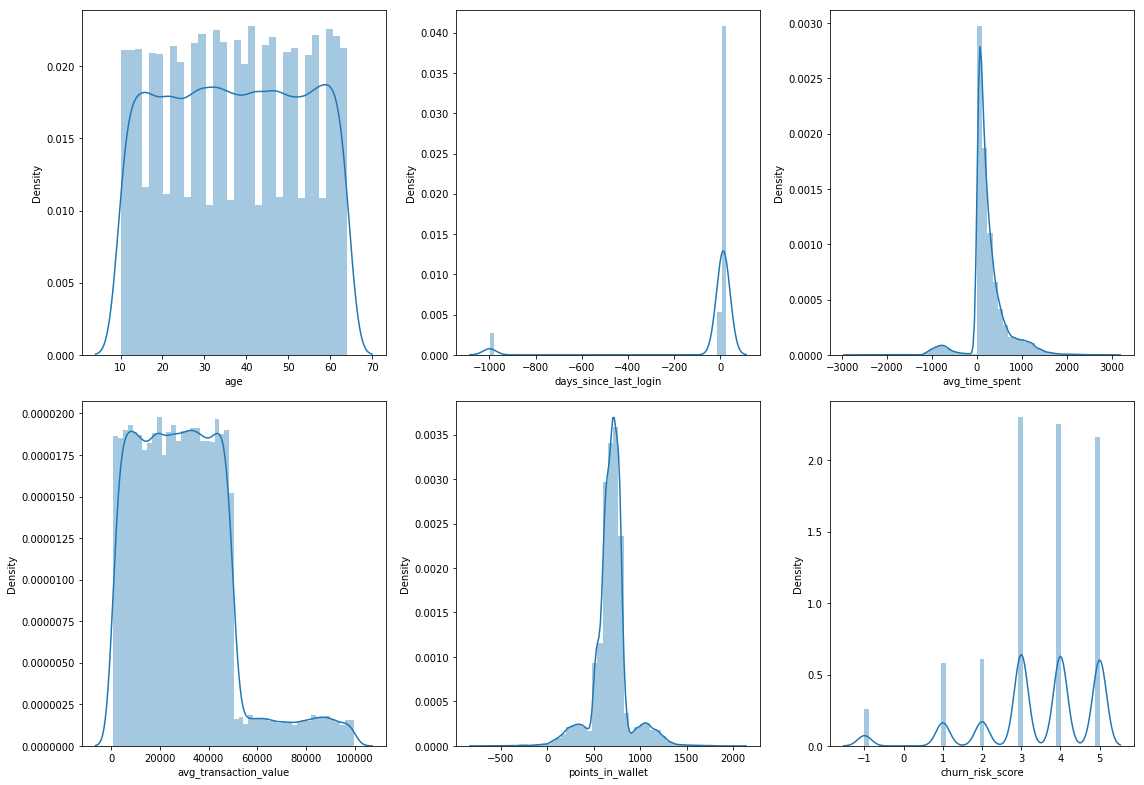

In [206]:
fig = plt.figure(figsize=(16,16))
for i in range(len(cont_features.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.distplot(cont_features.dropna().iloc[:,i])
plt.tight_layout()
plt.show()

#### points_in_wallet

In [207]:
df_train['points_in_wallet']=df_train['points_in_wallet'].fillna(df_train['points_in_wallet'].mean())
df_test['points_in_wallet']=df_test['points_in_wallet'].fillna(df_train['points_in_wallet'].mean())

In [208]:
df_train['points_in_wallet'].isna().sum()

0

#### Region Category

In [209]:
df_train['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [210]:
df_train['region_category'].isna().sum()

5428

In [211]:
df_train['region_category']=df_train['region_category'].fillna('Unknown')
df_test['region_category']=df_test['region_category'].fillna('Unknown')

#### preferred_offer_types

In [212]:
df_train['preferred_offer_types'].isna().sum()

288

In [213]:
df_train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [214]:
df_train['preferred_offer_types']=df_train['preferred_offer_types'].fillna(df_train['preferred_offer_types'].mode().values[0])
df_test['preferred_offer_types']=df_test['preferred_offer_types'].fillna(df_train['preferred_offer_types'].mode().values[0])

#### Gender

In [215]:
df_train['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [216]:
df_train['gender']=df_train['gender'].apply(lambda x:'F' if x == 'Unknown' else x)
df_test['gender']=df_test['gender'].apply(lambda x:'F' if x == 'Unknown' else x)

#### joined_through_referral

In [217]:
df_train['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [218]:
df_train['joined_through_referral']=df_train['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)
df_test['joined_through_referral']=df_test['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)

#### Medium of Operation

In [219]:
df_train['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [220]:
df_train['medium_of_operation']=df_train['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)
df_test['medium_of_operation']=df_test['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)

#### avg_login_frequency_days

In [221]:
df_train['avg_frequency_login_days']=df_train['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
df_train['avg_frequency_login_days']=df_train['avg_frequency_login_days'].astype('float')
df_test['avg_frequency_login_days']=df_test['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
df_test['avg_frequency_login_days']=df_test['avg_frequency_login_days'].astype('float')

In [222]:
df_train.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


In [223]:
cont_features,cat_feature=divideFeatures(df_train)

In [224]:
cont_features

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,18,17,300.630000,53005.25,17.0,781.750000,2
1,32,16,306.340000,12838.38,10.0,686.882199,1
2,44,14,516.160000,21027.00,22.0,500.690000,5
3,37,11,53.270000,25239.56,6.0,567.660000,5
4,31,20,113.130000,24483.66,16.0,663.060000,5
...,...,...,...,...,...,...,...
36987,46,2,-650.682759,27277.68,6.0,639.510000,4
36988,29,13,-638.123421,11069.71,28.0,527.990000,5
36989,23,12,154.940000,38127.56,0.0,680.470000,4
36990,53,15,482.610000,2378.86,20.0,197.264414,3


## Create dummy variables

In [225]:
df_train=pd.get_dummies(df_train,drop_first=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [226]:
df_train.shape

(36992, 38)

In [227]:
df_test.shape

(19919, 37)

## Train_test_split

In [228]:
X=df_train.drop('churn_risk_score',axis=1)
y=df_train['churn_risk_score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=324)

In [229]:
X_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,region_category_Unknown,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
14101,24,12,33.08000,25825.62,0.0,571.55,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
34373,47,5,1622.28628,27126.61,28.0,613.92,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0
27416,38,23,32.50000,93951.83,17.0,782.10,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
11814,30,22,458.83000,5397.79,12.0,592.96,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
30413,61,20,89.18000,22901.65,22.0,706.10,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [230]:
cont_features=cont_features.drop('churn_risk_score',axis=1)

In [231]:
cont_features.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet'],
      dtype='object')

## Data Standardization

In [232]:
scaler=StandardScaler()
X_train[cont_features.columns] = scaler.fit_transform(X_train[cont_features.columns])

# scale test data with transform()
X_test[cont_features.columns] = scaler.transform(X_test[cont_features.columns])

In [233]:
X_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,region_category_Unknown,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
14101,-0.827141,0.235243,-0.529418,-0.178105,-1.453662,-0.625427,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
34373,0.620909,0.204604,3.453308,-0.111126,1.368264,-0.396168,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0
27416,0.054281,0.283391,-0.530872,3.329203,0.259650,0.513834,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
11814,-0.449389,0.279014,0.537558,-1.229780,-0.244265,-0.509580,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
30413,1.502330,0.270260,-0.388826,-0.328638,0.763566,0.102607,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


## Data Modelling

In [237]:
! pip install xgboost

In [238]:
from xgboost import XGBClassifier

In [239]:
xgb_clf=XGBClassifier()

In [240]:
xgb_clf.fit(X_train,y_train)

[13:15:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [241]:
xgb_clf.score(X_train,y_train)

0.9057209475213733

In [242]:
xgb_clf.score(X_test,y_test)

0.7605081767806461

In [264]:
mask=xgb_clf.feature_importances_.round(2) > 0.0
# Apply the mask to the feature dataset X
reduced_X = X_train.loc[:,mask]

# prints out the selected column names
print((reduced_X.columns))

Index(['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership',
       'feedback_Poor Customer Service', 'feedback_Poor Product Quality',
       'feedback_Poor Website', 'feedback_Products always in Stock',
       'feedback_Quality Customer Care', 'feedback_Reasonable Price',
       'feedback_Too many ads', 'feedback_User Friendly Website'],
      dtype='object')


In [251]:
dict(zip(X_train.columns, xgb_clf.feature_importances_.round(2)))

{'age': 0.0,
 'days_since_last_login': 0.0,
 'avg_time_spent': 0.0,
 'avg_transaction_value': 0.02,
 'avg_frequency_login_days': 0.01,
 'points_in_wallet': 0.06,
 'gender_M': 0.0,
 'region_category_Town': 0.0,
 'region_category_Unknown': 0.0,
 'region_category_Village': 0.0,
 'membership_category_Gold Membership': 0.11,
 'membership_category_No Membership': 0.07,
 'membership_category_Platinum Membership': 0.11,
 'membership_category_Premium Membership': 0.1,
 'membership_category_Silver Membership': 0.11,
 'joined_through_referral_Yes': 0.0,
 'preferred_offer_types_Gift Vouchers/Coupons': 0.0,
 'preferred_offer_types_Without Offers': 0.0,
 'medium_of_operation_Desktop': 0.0,
 'medium_of_operation_Smartphone': 0.0,
 'internet_option_Mobile_Data': 0.0,
 'internet_option_Wi-Fi': 0.0,
 'used_special_discount_Yes': 0.0,
 'offer_application_preference_Yes': 0.0,
 'past_complaint_Yes': 0.0,
 'complaint_status_Not Applicable': 0.0,
 'complaint_status_Solved': 0.0,
 'complaint_status_Solved in

In [267]:
xgb_mod=XGBClassifier()
xgb_mod.fit(X_train[reduced_X.columns],y_train)

[17:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [268]:
xgb_mod.score(X_train[reduced_X.columns],y_train)

0.8632108944682865

In [270]:
xgb_mod.score(X_test[reduced_X.columns],y_test)

0.7615894039735099

In [276]:
print(f1_score(y_test, xgb_mod.predict(X_test[reduced_X.columns]), average="macro")*100)

63.9601398898017


In [277]:
! pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=6241 sha256=98583798425d3926b3cef8d93083a7fb1081c2ababd4b85f6d66c22cab78476b
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying
